In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('/Users/zhiyuelu/Downloads/E Commerce Dataset.xlsx', sheet_name=1)

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# EDA (Pre-model Analysis)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
# check missing data percentage
df.isnull().sum() / len(df) *100 

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

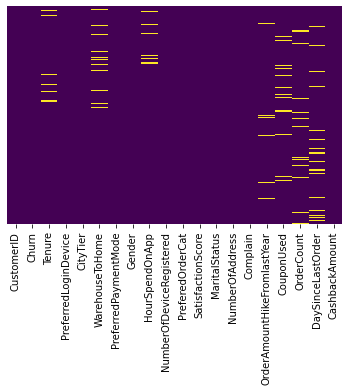

In [7]:
#using sns to plot the missing values in all columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## target='Churn'

<AxesSubplot:ylabel='Churn'>

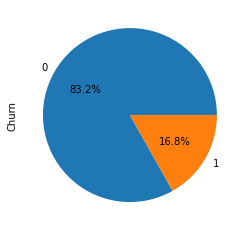

In [7]:
# check churn percentage
df.Churn.value_counts().plot(kind='pie', autopct='%1.1f%%')

## check outliners

In [8]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Text(0.5, 1.0, 'The boxplot to study outliers')

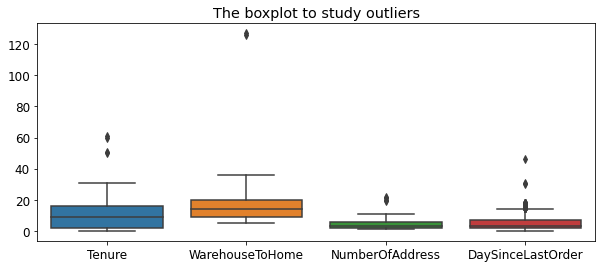

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['Tenure', 'WarehouseToHome', 'PreferredPaymentMode',
                     'PreferedOrderCat', 'NumberOfAddress', 'DaySinceLastOrder']])
plt.title('The boxplot to study outliers')

Text(0, 0.5, 'Values')

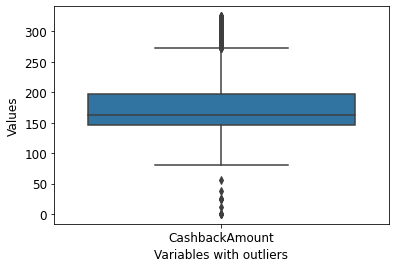

In [23]:
plt.rcParams['font.size'] = 12
sns.boxplot(data=df[['CashbackAmount']])
plt.xlabel('Variables with outliers')
plt.ylabel('Values')

<AxesSubplot:>

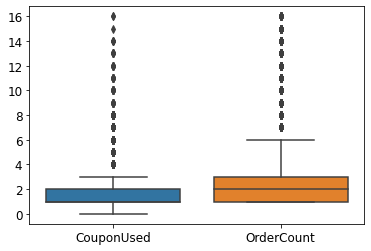

In [19]:
sns.boxplot(data=df[['CouponUsed', 'OrderCount']])

## numerical features

In [13]:
import numpy as np

In [40]:
df.HourSpendOnApp.groupby(df.Churn).value_counts()

Churn  HourSpendOnApp
0      3.0               2227
       2.0               1239
       4.0                978
       1.0                 35
       0.0                  3
       5.0                  3
1      3.0                460
       2.0                232
       4.0                198
Name: HourSpendOnApp, dtype: int64

In [25]:
class num_feature_plot():

    def hist(self, x1, col, x2):
        df=pd.DataFrame({0:x1.groupby(x2).get_group(0).value_counts(),
                         1:x1.groupby(x2).get_group(1).value_counts()})
        df.plot.bar()
        plt.xlabel(col)
        plt.ylabel('count')
        plt.title('customer counts')
        plt.legend(title='Churn')
        
    def percent(self, x1, col, x2):
        df=pd.DataFrame({0:x1.groupby(x2).get_group(0).value_counts(),
                         1:x1.groupby(x2).get_group(1).value_counts()})
        plt.bar(df.index, df[1]/(df[0]+df[1]))
        plt.locator_params(axis='x', nbins=len(df.index))
        plt.xticks(np.arange(min(df.index), max(df.index)+1, 1))
        plt.xlabel(col)
        plt.ylabel('churn percentage')

In [26]:
plot_num=num_feature_plot()

### Tenure: Good feature

<Figure size 576x360 with 0 Axes>

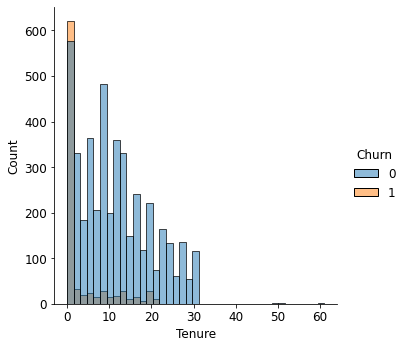

In [48]:
plt.figure(figsize=(8,5))
sns.displot(data = df, x='Tenure', hue='Churn', kind = 'hist')

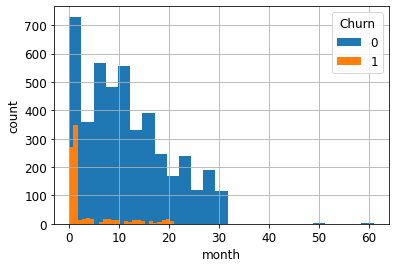

In [41]:
df.Tenure.groupby(df.Churn).hist(bins=25, legend=True)
plt.xlabel('month')
plt.ylabel('count')
plt.legend(title='Churn')

### WarehouseToHome: Good feature

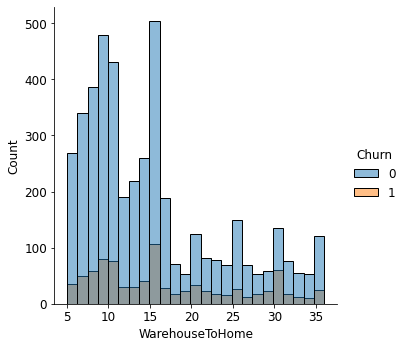

In [47]:
sns.displot(data = df[df.WarehouseToHome<126], x='WarehouseToHome', 
            hue='Churn', kind = 'hist')

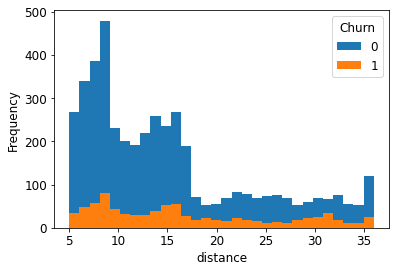

In [49]:
df[df.WarehouseToHome<126].WarehouseToHome.groupby(df.Churn).plot(kind='hist', 
                                        bins=30, legend=True)
plt.xlabel('distance')
plt.legend(title='Churn')

In [19]:
df.WarehouseToHome.max()
# treat this as an outliner

127.0

In [52]:
df[df.WarehouseToHome>50]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


### HourSpendOnApp:

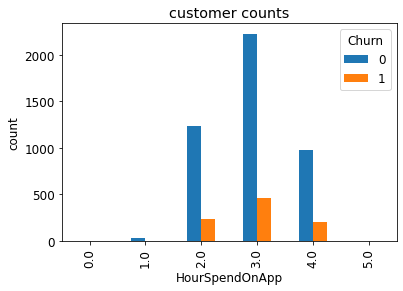

In [53]:
plot_num.hist(df.HourSpendOnApp, 'HourSpendOnApp', df.Churn)

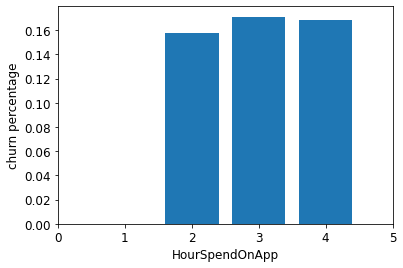

In [54]:
plot_num.percent(df.HourSpendOnApp, 'HourSpendOnApp', df.Churn)

### NumberOfDeviceRegistered: good

In [51]:
df.NumberOfDeviceRegistered.groupby(df.Churn).value_counts()

Churn  NumberOfDeviceRegistered
0      4                           1985
       3                           1445
       5                            683
       2                            250
       1                            213
       6                            106
1      4                            392
       3                            254
       5                            198
       6                             56
       2                             26
       1                             22
Name: NumberOfDeviceRegistered, dtype: int64

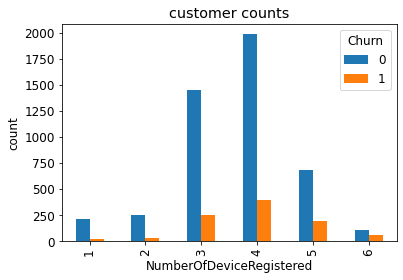

In [55]:
plot_num.hist(df.NumberOfDeviceRegistered, 
              'NumberOfDeviceRegistered', df.Churn)

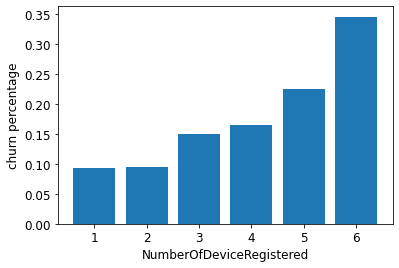

In [56]:
plot_num.percent(df.NumberOfDeviceRegistered,
                 'NumberOfDeviceRegistered', df.Churn)

### SatisfactionScore: good feature

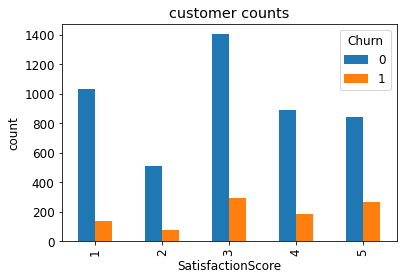

In [57]:
plot_num.hist(df.SatisfactionScore, 'SatisfactionScore', df.Churn)

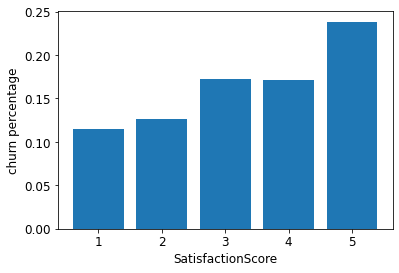

In [58]:
plot_num.percent(df.SatisfactionScore, 'SatisfactionScore', df.Churn)

### NumberOfAddress:

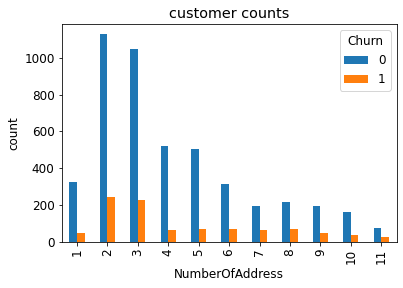

In [59]:
plot_num.hist(df[df.NumberOfAddress<=11].NumberOfAddress, 
              'NumberOfAddress', df.Churn)

In [60]:
df[df.NumberOfAddress>11]
# outlinears, need to remove

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
260,50261,1,NaN,Computer,1,10.0,COD,Male,2.0,3,Mobile,2,Single,19,1,23.0,1.0,1.0,0.0,122.85
691,50692,0,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,21,0,15.0,1.0,1.0,3.0,167.82
3075,53076,1,1.0,Computer,1,11.0,COD,Male,3.0,4,Mobile Phone,2,Single,20,1,24.0,2.0,2.0,1.0,147.85
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82


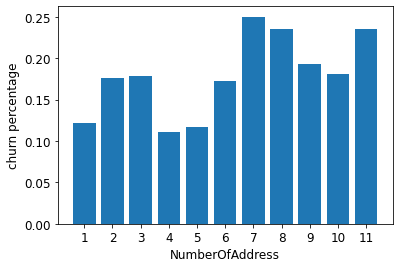

In [61]:
plot_num.percent(df[df.NumberOfAddress<=11].NumberOfAddress, 
                 'NumberOfAddress', df.Churn)

### OrderAmountHikeFromlastYear:

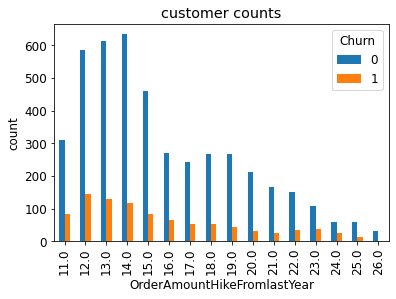

In [62]:
plot_num.hist(df.OrderAmountHikeFromlastYear, 
              'OrderAmountHikeFromlastYear', df.Churn)

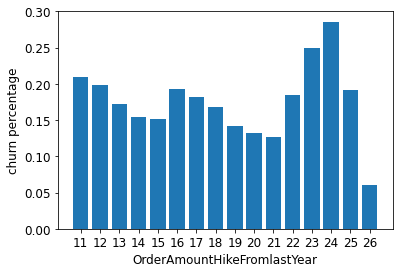

In [63]:
plot_num.percent(df.OrderAmountHikeFromlastYear, 
                 'OrderAmountHikeFromlastYear', df.Churn)

### CouponUsed:

In [64]:
df.CouponUsed.groupby(df.Churn).value_counts()

Churn  CouponUsed
0      1.0           1727
       2.0           1061
       0.0            844
       3.0            281
       4.0            167
       5.0            106
       6.0             90
       7.0             71
       8.0             33
       9.0             11
       10.0            11
       11.0            10
       12.0             8
       13.0             8
       14.0             5
       16.0             1
1      1.0            378
       2.0            222
       0.0            186
       3.0             46
       4.0             30
       5.0             23
       6.0             18
       7.0             18
       8.0              9
       10.0             3
       9.0              2
       11.0             2
       12.0             1
       15.0             1
       16.0             1
Name: CouponUsed, dtype: int64

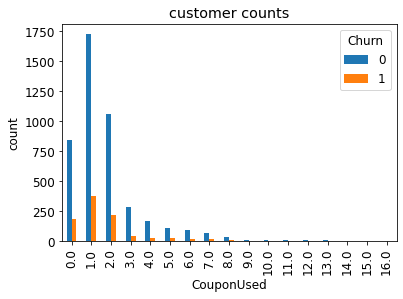

In [65]:
plot_num.hist(df.CouponUsed, 'CouponUsed', df.Churn)

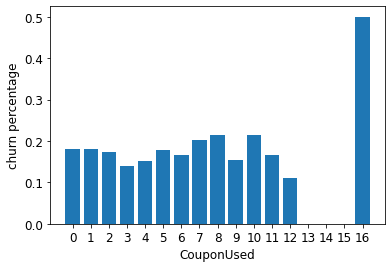

In [66]:
plot_num.percent(df.CouponUsed, 'CouponUsed', df.Churn)

### OrderCount: good

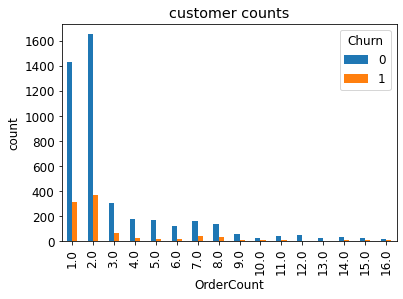

In [67]:
plot_num.hist(df.OrderCount, 'OrderCount', df.Churn)

In [68]:
df.OrderCount.sum()

16159.0

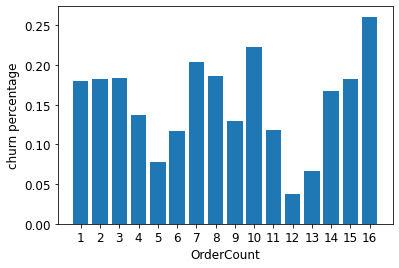

In [69]:
plot_num.percent(df.OrderCount, 'OrderCount', df.Churn)

<AxesSubplot:ylabel='OrderCount'>

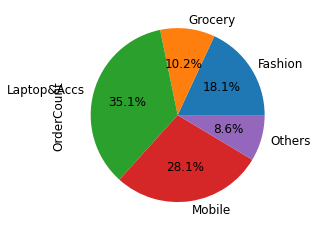

In [72]:
df.OrderCount.groupby(OrderCat).sum().plot(kind='pie', autopct='%1.1f%%', )

### CashbackAmount: Good

Text(0.5, 0, 'CashbackAmount')

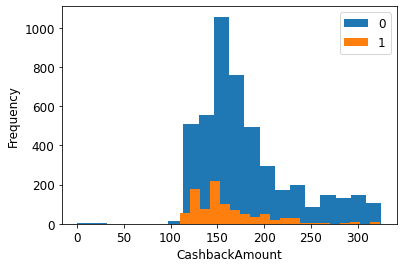

In [73]:
df.CashbackAmount.groupby(df.Churn).plot.hist(bins=20, legend=True)
plt.xlabel('CashbackAmount')

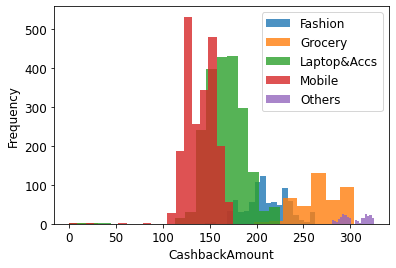

In [74]:
df.CashbackAmount.groupby(OrderCat).plot.hist(bins=20, legend=True, alpha=0.8)
plt.xlabel('CashbackAmount')
plt.show()

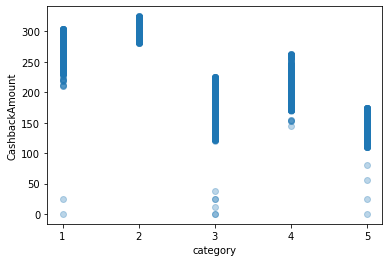

In [67]:
plt.scatter(df.PreferedOrderCat.map(
    {'Laptop & Accessory':3, 'Mobile':5, 'Mobile Phone':5, 'Others':2, 
     'Fashion':4, 'Grocery':1}), df.CashbackAmount, 
           alpha=0.3)
plt.xlabel('category')
plt.ylabel('CashbackAmount')
plt.locator_params(axis='x', nbins=5)

Text(0, 0.5, 'Tenure/month')

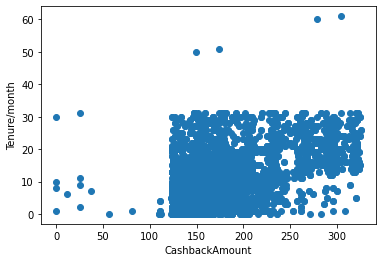

In [58]:
plt.scatter(df.CashbackAmount, df.Tenure)
plt.xlabel('CashbackAmount')
plt.ylabel('Tenure/month')

In [76]:
totalAmount=df.CashbackAmount*df.OrderCount

Text(0.5, 0, 'totalCashbackAmount')

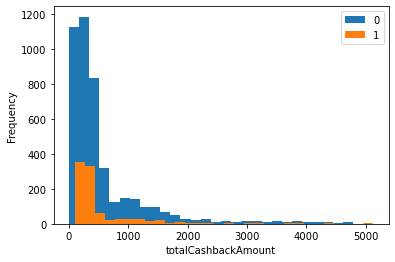

In [66]:
totalAmount.groupby(df.Churn).plot.hist(bins=30, legend=True)
plt.xlabel('totalCashbackAmount')

<AxesSubplot:ylabel='None'>

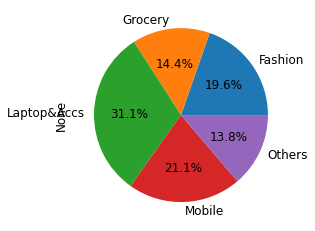

In [77]:
totalAmount.groupby(OrderCat).sum().plot(kind='pie', autopct='%1.1f%%', )

<AxesSubplot:xlabel='Gender'>

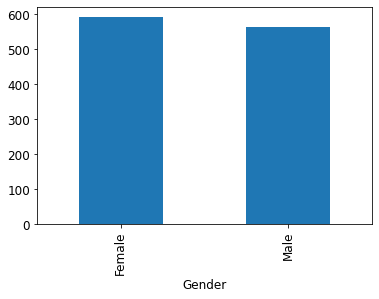

In [78]:
totalAmount.groupby(df.Gender).mean().plot(kind='bar')

<AxesSubplot:xlabel='PreferedOrderCat'>

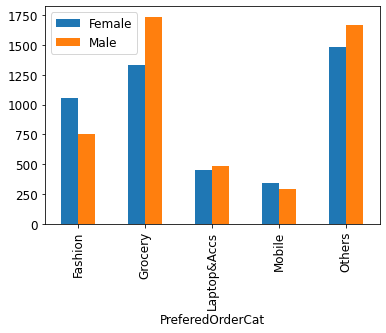

In [79]:
dic={
'Female':totalAmount.groupby(df.Gender).get_group('Female').groupby(OrderCat).mean(),
'Male':totalAmount.groupby(df.Gender).get_group('Male').groupby(OrderCat).mean()}
pd.DataFrame(dic).plot.bar()
# 女人爱买衣服 哈哈 ：）

<AxesSubplot:xlabel='PreferedOrderCat', ylabel='count'>

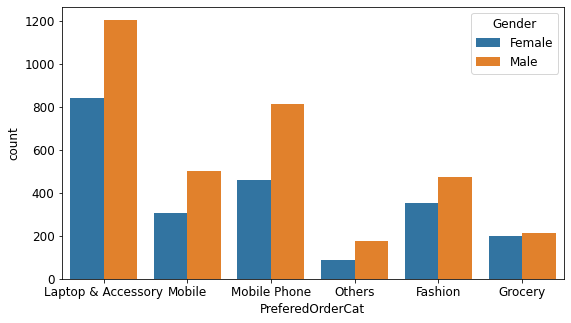

In [83]:
plt.figure(figsize=(9, 5))
sns.countplot(x='PreferedOrderCat', data=df, hue='Gender')

<AxesSubplot:xlabel='MaritalStatus'>

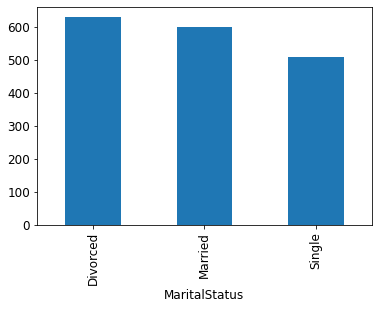

In [84]:
totalAmount.groupby(df.MaritalStatus).mean().plot(kind='bar')

<AxesSubplot:xlabel='PreferedOrderCat'>

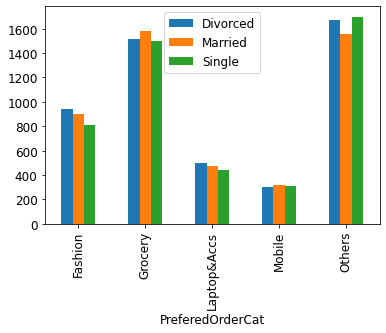

In [85]:
dic2={
'Divorced':totalAmount.groupby(df.MaritalStatus).get_group(
          'Divorced').groupby(OrderCat).mean(),
'Married':totalAmount.groupby(df.MaritalStatus).get_group(
          'Married').groupby(OrderCat).mean(),
'Single':totalAmount.groupby(df.MaritalStatus).get_group(
          'Single').groupby(OrderCat).mean()}

pd.DataFrame(dic2).plot.bar()

### DaySinceLastOrder:

In [86]:
df[df.DaySinceLastOrder>=30].DaySinceLastOrder
# outliner

1490    30.0
2040    46.0
4305    31.0
Name: DaySinceLastOrder, dtype: float64

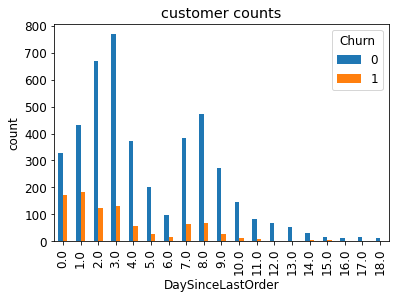

In [87]:
plot_num.hist(df[df.DaySinceLastOrder<30].DaySinceLastOrder, 
              'DaySinceLastOrder', df.Churn)

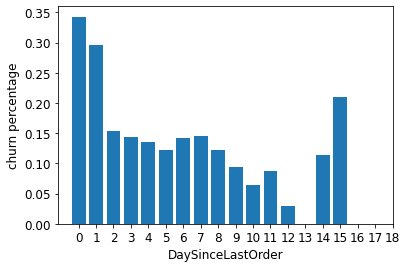

In [88]:
plot_num.percent(df[df.DaySinceLastOrder<30].DaySinceLastOrder,
                 'DaySinceLastOrder', df.Churn)

## categorical features

In [93]:
# class cat_feature_plot():

#     def hist(self, x1, col, x2):
#         df=pd.DataFrame({0:x1.groupby(x2).get_group(0).value_counts(),
#                          1:x1.groupby(x2).get_group(1).value_counts()})
#         df.plot.bar(rot=0)
#         plt.xlabel(col)
#         plt.ylabel('count')
#         plt.title('customer counts')
        
#     def percent(self, x1, col, x2):
#         df=pd.DataFrame({0:x1.groupby(x2).get_group(0).value_counts(),
#                          1:x1.groupby(x2).get_group(1).value_counts()})
#         plt.bar(df.index, df[1]/(df[0]+df[1]))
#         plt.xlabel(col)
#         plt.ylabel('churn percentage')

In [90]:
# plot_cat=cat_feature_plot()

In [97]:
def cat_plot(x1, col, x2):
    df=pd.DataFrame({0:x1.groupby(x2).get_group(0).value_counts(),
                     1:x1.groupby(x2).get_group(1).value_counts()})
    
    
    fig, axs=plt.subplots(1,2, figsize=(10, 4))
    
    df.plot.bar(rot=0, ax=axs[0], title='customer counts', 
                xlabel=col, ylabel='count', )
 
    axs[1].bar(df.index, df[1]/(df[0]+df[1]))
    plt.xlabel(col)
    plt.ylabel('churn percentage')
    #plt.locator_params(axis='x', nbins=len(df.index))
    
    plt.tight_layout()

### PreferredLoginDevice:

In [11]:
df.PreferredLoginDevice.unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [5]:
PreferredLoginDevice=df.PreferredLoginDevice.map(
    lambda x:x if x=='Computer' else 'Mobile')

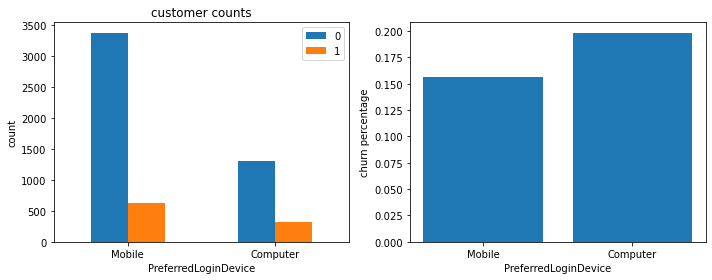

In [10]:
cat_plot(PreferredLoginDevice, 'PreferredLoginDevice', df.Churn)

### CityTier: good

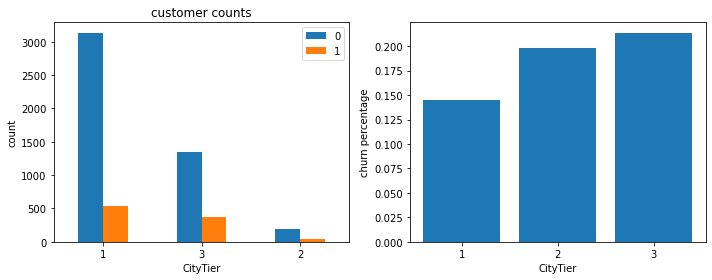

In [29]:
cat_plot(df.CityTier, 'CityTier', df.Churn)

### PreferredPaymentMode:

In [13]:
df.PreferredPaymentMode.unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [18]:
PaymentMode=df.PreferredPaymentMode.map(
    lambda x:x if x!='CC' else 'Credit Card').map(
    lambda x:x if x!='COD' and x!='Cash on Delivery' else 'CashonDlvy')

In [19]:
PaymentMode.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'CashonDlvy', 'E wallet'],
      dtype=object)

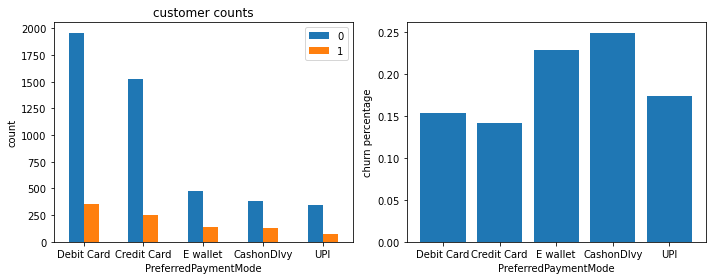

In [20]:
cat_plot(PaymentMode, 'PreferredPaymentMode', df.Churn)

### Gender:

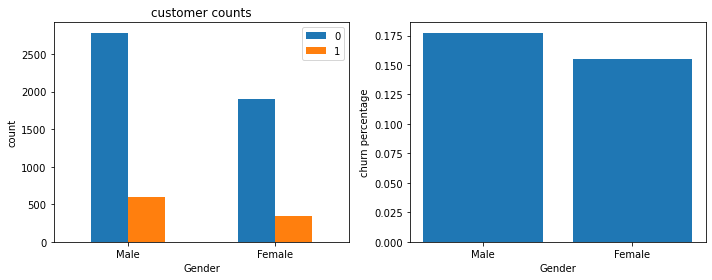

In [36]:
cat_plot(df.Gender, 'Gender', df.Churn)

### MaritalStatus: good feature

Even though this is a good feature, we still need to eliminate this one because it is hard for us to collect and update the data monthly. 

In [37]:
df.MaritalStatus.describe()
#no missing value

count        5630
unique          3
top       Married
freq         2986
Name: MaritalStatus, dtype: object

In [38]:
df.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

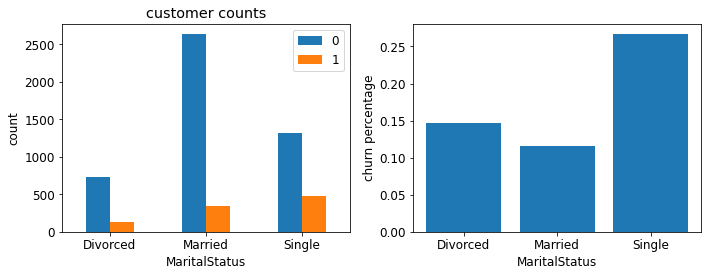

In [98]:
cat_plot(df.MaritalStatus, 'MaritalStatus', df.Churn)

### PreferedOrderCat: good

In [70]:
df.PreferedOrderCat.unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [41]:
df.PreferedOrderCat.describe()

count                   5630
unique                     6
top       Laptop & Accessory
freq                    2050
Name: PreferedOrderCat, dtype: object

In [71]:
OrderCat=df.PreferedOrderCat.map(
    lambda x:x if x!='Mobile Phone' else 'Mobile').map(
    lambda x:x if x!='Laptop & Accessory' else 'Laptop&Accs')

In [25]:
OrderCat.unique()

array(['Laptop&Accs', 'Mobile', 'Others', 'Fashion', 'Grocery'],
      dtype=object)

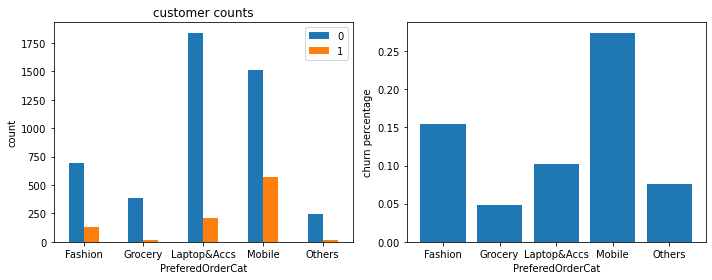

In [26]:
cat_plot(OrderCat, 'PreferedOrderCat', df.Churn)

In [71]:
num=df.PreferedOrderCat.map({'Laptop & Accessory':3, 'Mobile':5, 
                 'Mobile Phone':5, 'Others':2, 'Fashion':4, 'Grocery':1})

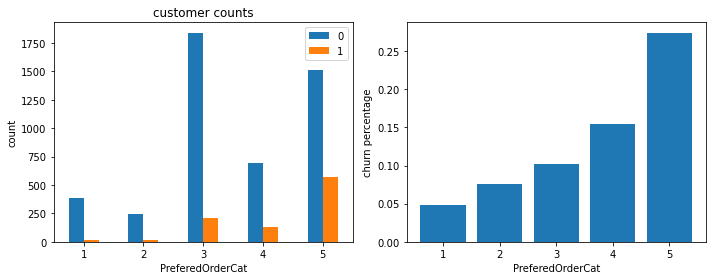

In [72]:
cat_plot(num, 'PreferedOrderCat', df.Churn)

### Complain: good feature

In [42]:
df.Complain.describe()

count    5630.000000
mean        0.284902
std         0.451408
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Complain, dtype: float64

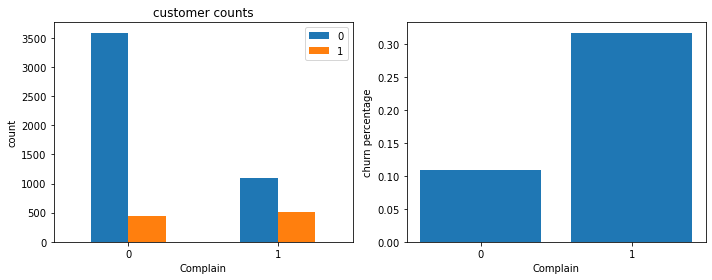

In [31]:
cat_plot(df.Complain, 'Complain', df.Churn)

# Problem Definition

translate the business needs into machine learning problems; design metrics to measure model performance.

We are going to build classfication models to make prediction of customer churn, using the above features. We will evaluate the model performance by ROC-AUC score, and select the threshold by balancing precision and recall, and maximizing the profit. We will firstly use random forest as benchmark, then try logistic regression. 

We will give actionable suggestions to business according to insight we obtained from the model. 

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Feature Engineering

In [4]:
class treeTransformer():
    def fit(self, X, y=None):
        df=pd.DataFrame()
        #numerical: good feature to logistic regression
        df['Tenure']=X.Tenure
        df['WarehouseToHome']=X.WarehouseToHome
        df['NumberOfDeviceRegistered']=X.NumberOfDeviceRegistered
        df['SatisfactionScore']=X.SatisfactionScore
        df['CashbackAmount']=X.CashbackAmount
        #numerical: for tree
        df['NumberOfAddress']=X.NumberOfAddress
        df['OrderAmountHikeFromlastYear']=X.OrderAmountHikeFromlastYear
        df['CouponUsed']=X.CouponUsed
        df['OrderCount']=X.OrderCount
        df['DaySinceLastOrder']=X.DaySinceLastOrder    
        #catagorical 
        #self.marital={'Single':3, 'Divorced':2, 'Married':1}
        self.cat= {'Laptop & Accessory':3, 'Mobile':5, 'Mobile Phone':5, 
                   'Others':2, 'Fashion':4, 'Grocery':1}
        
        df['CityTier']=X.CityTier
        #df['MaritalStatus']=X.MaritalStatus.map(self.marital) 
#         df['PreferredPaymentMode']=X.PreferredPaymentMode.map(
#          lambda x:x if x!='CC' else 'Credit Card').map(
#          lambda x:x if x!='COD' and x!='Cash on Delivery' else 'CashonDlvy')
        
        df['PreferedOrderCat']=X.PreferedOrderCat.map(self.cat)
        df['Complain']=X.Complain
        
        self.median=df.median()
        
    def transform(self, X, y=None):
        df=pd.DataFrame()
        #numerical: good feature to logistic regression
        df['Tenure']=X.Tenure
        df['WarehouseToHome']=X.WarehouseToHome
        df['NumberOfDeviceRegistered']=X.NumberOfDeviceRegistered
        df['SatisfactionScore']=X.SatisfactionScore
        df['CashbackAmount']=X.CashbackAmount
        #numerical: for tree
        df['NumberOfAddress']=X.NumberOfAddress
        df['OrderAmountHikeFromlastYear']=X.OrderAmountHikeFromlastYear
        df['CouponUsed']=X.CouponUsed
        df['OrderCount']=X.OrderCount
        df['DaySinceLastOrder']=X.DaySinceLastOrder
        #catagorical
        df['CityTier']=X.CityTier
        #df['MaritalStatus']=X.MaritalStatus.map(self.marital) 
#         df['PreferredPaymentMode']=X.PreferredPaymentMode.map(
#          lambda x:x if x!='CC' else 'Credit Card').map(
#          lambda x:x if x!='COD' and x!='Cash on Delivery' else 'CashonDlvy')
        
        df['PreferedOrderCat']=X.PreferedOrderCat.map(self.cat)
        df['Complain']=X.Complain
        
        self.features=list(df.columns)
        return df.fillna(self.median) # fillana with medium
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [11]:
transf = treeTransformer()
cleaned_df=transf.fit_transform(df)

In [12]:
cleaned_df['Churn']=df.Churn
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5630 non-null   float64
 1   WarehouseToHome              5630 non-null   float64
 2   NumberOfDeviceRegistered     5630 non-null   int64  
 3   SatisfactionScore            5630 non-null   int64  
 4   CashbackAmount               5630 non-null   float64
 5   NumberOfAddress              5630 non-null   int64  
 6   OrderAmountHikeFromlastYear  5630 non-null   float64
 7   CouponUsed                   5630 non-null   float64
 8   OrderCount                   5630 non-null   float64
 9   DaySinceLastOrder            5630 non-null   float64
 10  CityTier                     5630 non-null   int64  
 11  PreferedOrderCat             5630 non-null   int64  
 12  Complain                     5630 non-null   int64  
 13  Churn             

In [13]:
cleaned_df.to_csv('churn_cleaned_data', index=False)

In [101]:
feature=list(df.columns)
target='Churn'
feature.remove(target)

## Unsupervised learning with PCA

In [48]:
steps = [('transform', treeTransformer()),
         ('rescale', MinMaxScaler()),
         ('pca',PCA())]
pca = Pipeline(steps)
pca.fit(df[feature])

Pipeline(steps=[('transform',
                 <__main__.treeTransformer object at 0x7fc2b537a6a0>),
                ('rescale', MinMaxScaler()), ('pca', PCA())])

Text(0, 0.5, 'variance ratio')

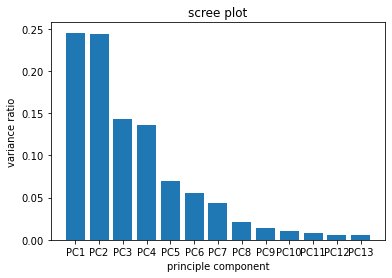

In [49]:
plt.bar(['PC'+str(i+1) for i in range(len(pca[0].features))], 
          pca[-1].explained_variance_ratio_)
plt.title('scree plot')
plt.xlabel('principle component')
plt.ylabel('variance ratio')

Text(0.9, 0.9, '95% cut-off threshold')

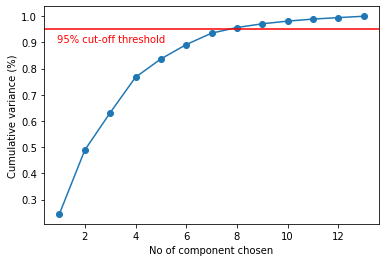

In [52]:
plt.plot([i+1 for i in range(len(pca[0].features))], 
        np.cumsum(pca[-1].explained_variance_ratio_), marker='o')
plt.xlabel('No of component chosen')
plt.ylabel('Cumulative variance (%)')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.9, 0.9, '95% cut-off threshold', color = 'red', fontsize=10)

## check Pearson Correlation

In [56]:
train=pca[0].fit_transform(df[feature])
train.corr()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,CashbackAmount,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,MaritalStatus,PreferedOrderCat,Complain
Tenure,1.000000,-0.012191,-0.020657,-0.014452,0.467986,0.235076,-0.005542,0.101535,0.165339,0.174378,-0.107977,-0.422939,-0.020535
WarehouseToHome,-0.012191,1.000000,0.023020,0.007524,0.000415,-0.008305,0.038311,0.002675,0.000354,0.020253,-0.029315,-0.033750,0.026825
NumberOfDeviceRegistered,-0.020657,0.023020,1.000000,-0.017228,0.137183,0.084997,0.065714,0.152065,0.099790,0.007350,0.042717,0.013759,0.003407
SatisfactionScore,-0.014452,0.007524,-0.017228,1.000000,0.003473,0.053583,-0.027121,0.017423,0.018166,0.031985,0.003081,0.009240,-0.031115
CashbackAmount,0.467986,0.000415,0.137183,0.003473,1.000000,0.186688,-0.009620,0.219394,0.322313,0.316568,-0.072332,-0.691492,0.000525
NumberOfAddress,0.235076,-0.008305,0.084997,0.053583,0.186688,1.000000,0.012161,0.036985,-0.013970,-0.067180,-0.011827,-0.135202,-0.026399
OrderAmountHikeFromlastYear,-0.005542,0.038311,0.065714,-0.027121,-0.009620,0.012161,1.000000,0.024482,0.010567,-0.004621,0.000649,0.039682,-0.003842
CouponUsed,0.101535,0.002675,0.152065,0.017423,0.219394,0.036985,0.024482,1.000000,0.641178,0.296816,-0.023656,-0.116730,-0.007810
OrderCount,0.165339,0.000354,0.099790,0.018166,0.322313,-0.013970,0.010567,0.641178,1.000000,0.421629,-0.047211,-0.224987,-0.021288
DaySinceLastOrder,0.174378,0.020253,0.007350,0.031985,0.316568,-0.067180,-0.004621,0.296816,0.421629,1.000000,-0.053762,-0.315705,-0.041415


- PreferedOrderCat & CashbackAmount has -0.7 very high correlation. 
- Tenure & CashbackAmount has 0.47, high correlation.

# Modeling and Metrics

## Random Forest as Benchmark

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
df[feature], df[target], test_size=0.2, 
    stratify=df[target],random_state=10)

steps = [('transform', treeTransformer()),
         ('rf',RandomForestClassifier(class_weight='balanced', n_jobs=-1, 
                                        max_depth=15,
                                        min_samples_leaf=2, n_estimators=200))]
model_rf = Pipeline(steps)
model_rf.fit(X_train, y_train)

y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)
y_train_proba = model_rf.predict_proba(X_train)
y_test_proba = model_rf.predict_proba(X_test)

print(f'train:{roc_auc_score(y_train, y_train_proba[:,1])}')
print(f'test:{roc_auc_score(y_test, y_test_proba[:,1])}')

train:0.9999383687366789
test:0.9833502024291497


In [104]:
print(f'train:{classification_report(y_train, y_train_pred)}')
print(f'test:{classification_report(y_test, y_test_pred)}')

train:              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3746
           1       0.96      1.00      0.98       758

    accuracy                           0.99      4504
   macro avg       0.98      1.00      0.99      4504
weighted avg       0.99      0.99      0.99      4504

test:              precision    recall  f1-score   support

           0       0.97      0.97      0.97       936
           1       0.84      0.86      0.85       190

    accuracy                           0.95      1126
   macro avg       0.90      0.91      0.91      1126
weighted avg       0.95      0.95      0.95      1126



In [105]:
confusion_matrix(y_train, y_train_pred)

array([[3717,   29],
       [   0,  758]])

In [106]:
confusion_matrix(y_test, y_test_pred)

array([[904,  32],
       [ 27, 163]])

In [109]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

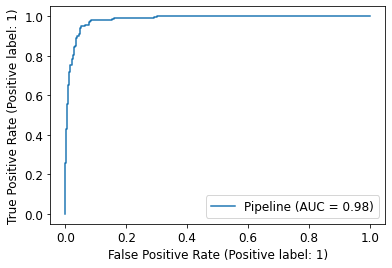

In [107]:
plot_roc_curve(model_rf, X_test, y_test)

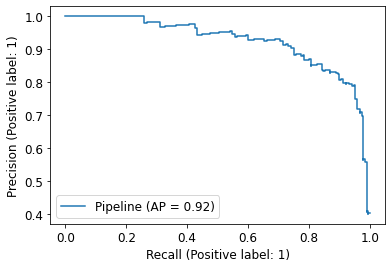

In [110]:
plot_precision_recall_curve(model_rf, X_test, y_test)

### cross-validation and hyperparameter tuning with GridSearchCV

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
gs=GridSearchCV(estimator = model_rf,
  param_grid = {'rf__n_estimators': [100, 200],
                'rf__min_samples_leaf': [2, 5, 10],
                'rf__min_samples_split': [2, 3],
                'rf__max_depth':[5,10,15]}, 
  scoring=('roc_auc'),
  cv = 3,
  n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

Pipeline(steps=[('transform',
                 <__main__.treeTransformer object at 0x7fe2b63db5e0>),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_leaf=2, n_estimators=200,
                                        n_jobs=-1))])
{'rf__max_depth': 15, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
0.9687810232887598


In [113]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)
y_train_proba = gs.predict_proba(X_train)
y_test_proba = gs.predict_proba(X_test)

print(f'train:{roc_auc_score(y_train, y_train_proba[:,1])}')
print(f'test:{roc_auc_score(y_test, y_test_proba[:,1])}')

train:0.9999344947715558
test:0.9839574898785425


### feature importance

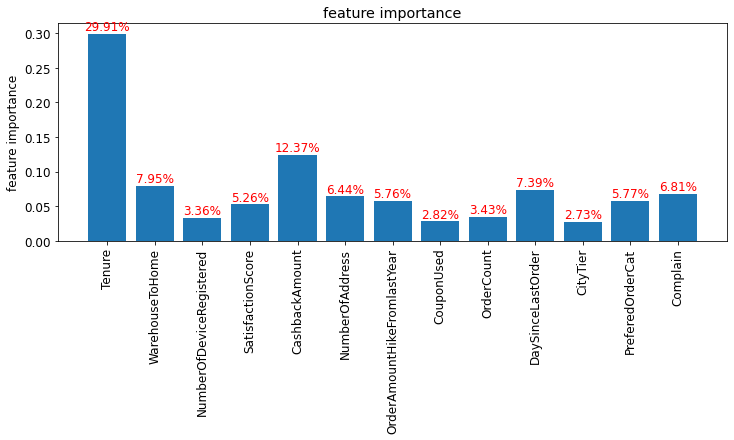

In [114]:
plt.figure(figsize=(12,4))
plt.bar(model_rf[0].features, model_rf[-1].feature_importances_)
plt.ylabel('feature importance')
plt.title('feature importance')
plt.xticks(rotation=90)

for index, value in enumerate(model_rf[-1].feature_importances_):
    plt.text(index, value+0.005, str((100*value).round(2))+'%', 
             ha='center', color='red')

### SHAP

In [115]:
import shap

In [116]:
# Fits the explainer
explainer=shap.TreeExplainer(model_rf[-1])
# Calculates the SHAP values - It takes some time
shap_values=explainer(model_rf[0].transform(X_test))

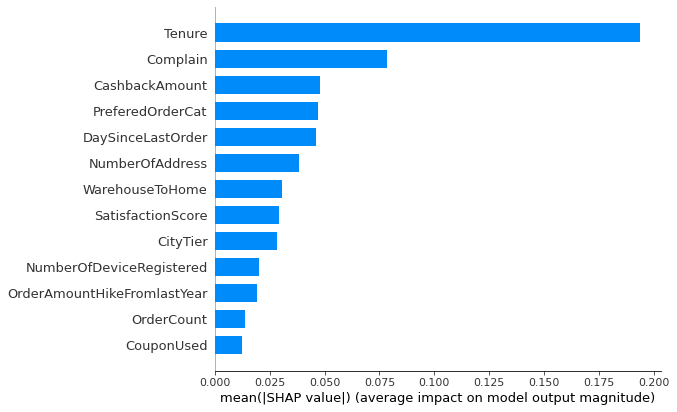

In [117]:
shap.summary_plot(shap_values[:,:,1], plot_type='bar')

In [111]:
shap.Explainer

shap.explainers._explainer.Explainer

In [118]:
shap_values

.values =
array([[[-0.21692574,  0.21692574],
        [ 0.07266077, -0.07266077],
        [ 0.00945373, -0.00945373],
        ...,
        [ 0.03229304, -0.03229304],
        [-0.04050991,  0.04050991],
        [ 0.1201278 , -0.1201278 ]],

       [[-0.29404845,  0.29404845],
        [-0.01687158,  0.01687158],
        [ 0.12097762, -0.12097762],
        ...,
        [ 0.02041725, -0.02041725],
        [ 0.02476566, -0.02476566],
        [ 0.08081046, -0.08081046]],

       [[ 0.23378007, -0.23378007],
        [ 0.02938981, -0.02938981],
        [-0.00956906,  0.00956906],
        ...,
        [-0.02977605,  0.02977605],
        [ 0.05211517, -0.05211517],
        [ 0.06813016, -0.06813016]],

       ...,

       [[-0.21801444,  0.21801444],
        [-0.00939826,  0.00939826],
        [ 0.00801837, -0.00801837],
        ...,
        [ 0.01468742, -0.01468742],
        [-0.08080972,  0.08080972],
        [-0.10694273,  0.10694273]],

       [[ 0.17649925, -0.17649925],
        [ 0.01278

In [119]:
shap_values[0][:,1]

.values =
array([ 0.21692574, -0.07266077, -0.00945373, -0.00577601, -0.03352649,
       -0.04950354, -0.0614348 , -0.00417209, -0.00861503, -0.07124668,
       -0.03229304,  0.04050991, -0.1201278 ])

.base_values =
0.4986001599170421

.data =
array([  1.  ,   8.  ,   4.  ,   3.  , 137.23,   3.  ,  23.  ,   2.  ,
         2.  ,   2.  ,   1.  ,   5.  ,   0.  ])

In [120]:
shap_values[:,:,1]

.values =
array([[ 0.21692574, -0.07266077, -0.00945373, ..., -0.03229304,
         0.04050991, -0.1201278 ],
       [ 0.29404845,  0.01687158, -0.12097762, ..., -0.02041725,
        -0.02476566, -0.08081046],
       [-0.23378007, -0.02938981,  0.00956906, ...,  0.02977605,
        -0.05211517, -0.06813016],
       ...,
       [ 0.21801444,  0.00939826, -0.00801837, ..., -0.01468742,
         0.08080972,  0.10694273],
       [-0.17649925, -0.01278723, -0.00709227, ..., -0.04199425,
        -0.00924384, -0.06587748],
       [ 0.20758136, -0.0909657 , -0.01352381, ...,  0.02038968,
        -0.10739194, -0.06640708]])

.base_values =
array([0.49860016, 0.49860016, 0.49860016, ..., 0.49860016, 0.49860016,
       0.49860016])

.data =
array([[ 1.,  8.,  4., ...,  1.,  5.,  0.],
       [ 1., 23.,  2., ...,  1.,  3.,  0.],
       [10., 23.,  5., ...,  3.,  3.,  0.],
       ...,
       [ 0., 13.,  3., ...,  1.,  5.,  1.],
       [13., 17.,  4., ...,  1.,  4.,  0.],
       [ 0.,  6.,  4., ..., 

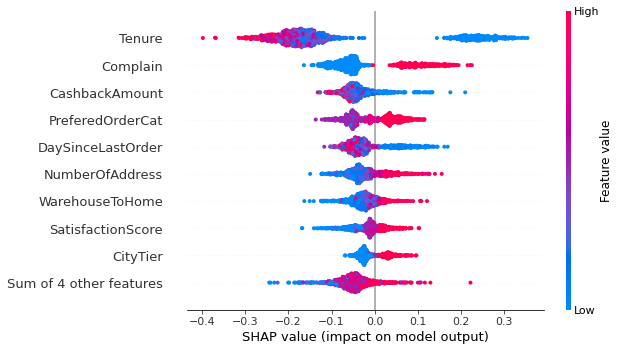

In [121]:
shap.plots.beeswarm(shap_values[:,:,1])

In [122]:
print(y_test_proba[4], y_test_pred[4])

[0.93627926 0.06372074] 0


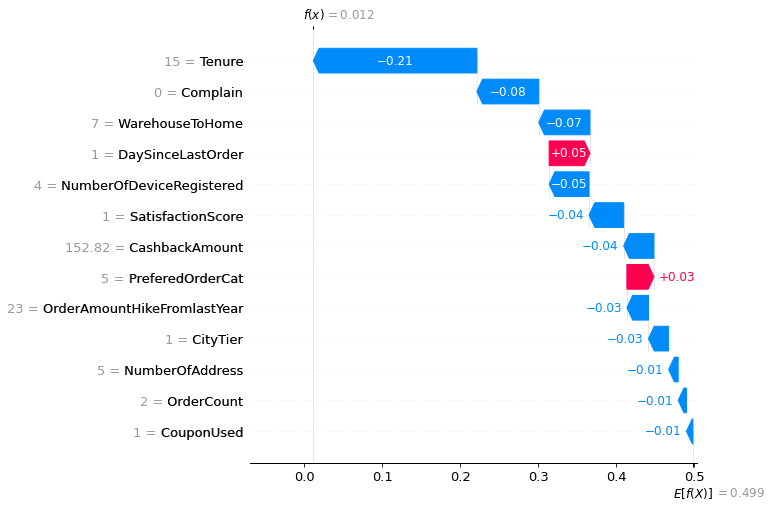

In [124]:
idx = 4
shap.plots.waterfall(shap_values[idx][:,1], max_display=15)

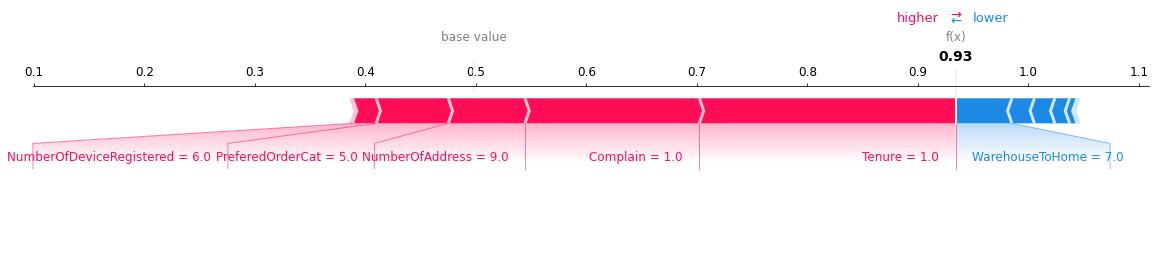

In [126]:
idx = 3
shap.plots.force(shap_values[idx][:,1], matplotlib=True)

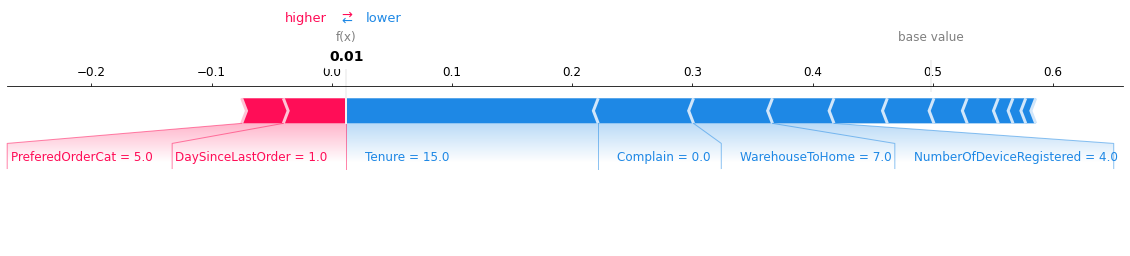

In [127]:
idx = 4
shap.plots.force(shap_values[idx][:,1], matplotlib=True)

In [128]:
shap_values.data.shape

(1126, 13)

In [129]:
X_test.shape

(1126, 19)

In [47]:
# If we are only interested in the SHAP values, we can use the
# explainer.shap_values() method:
# Evaluate SHAP values
shap_values = explainer.shap_values(model_rf[0].transform(X_test))

In [55]:
shap_values

[array([[-0.16889091,  0.08820147,  0.01386386, ...,  0.08865019,
         -0.02830716,  0.12742839],
        [-0.26872899, -0.0023944 ,  0.13317947, ...,  0.03237982,
          0.02026105,  0.07680865],
        [ 0.22243267,  0.03008075, -0.00505149, ...,  0.03127232,
          0.04934628,  0.04377179],
        ...,
        [-0.228103  , -0.01703317,  0.00212892, ...,  0.05091772,
         -0.08725723, -0.12121969],
        [ 0.16944954,  0.02356704,  0.01491096, ..., -0.02033853,
          0.01990602,  0.08274242],
        [-0.20141899,  0.17313041,  0.02040466, ..., -0.03213216,
          0.08099096,  0.07733559]]),
 array([[ 0.16889091, -0.08820147, -0.01386386, ..., -0.08865019,
          0.02830716, -0.12742839],
        [ 0.26872899,  0.0023944 , -0.13317947, ..., -0.03237982,
         -0.02026105, -0.07680865],
        [-0.22243267, -0.03008075,  0.00505149, ..., -0.03127232,
         -0.04934628, -0.04377179],
        ...,
        [ 0.228103  ,  0.01703317, -0.00212892, ..., -

In [54]:
shap_values[0].shape

(1126, 13)

## XGBoost

In [141]:
import xgboost as xbg
from xgboost import XGBClassifier

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
df[feature], df[target], test_size=0.2, 
    stratify=df[target],random_state=10)

steps = [('transform', treeTransformer()),
         ('xgb',XGBClassifier(
                learning_rate=0.3, n_estimators=200, max_depth=10, 
                min_child_weight=1, subsample=1, colsample_bytree=0.8, gamma=0.1, 
                reg_alpha=0, reg_lambda=0.1, 
                n_jobs=-1, use_label_encoder=False, scale_pos_weight=4.95)
         )]
model_xgb = Pipeline(steps)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)
y_train_proba = model_xgb.predict_proba(X_train)
y_test_proba = model_xgb.predict_proba(X_test)

print(f'train:{roc_auc_score(y_train, y_train_proba[:,1])}')
print(f'test:{roc_auc_score(y_test, y_test_proba[:,1])}')

[12:09:26] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train:1.0
test:0.9910818713450292


In [143]:
print(f'train:{classification_report(y_train, y_train_pred)}')
print(f'test:{classification_report(y_test, y_test_pred)}')

train:              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3746
           1       1.00      1.00      1.00       758

    accuracy                           1.00      4504
   macro avg       1.00      1.00      1.00      4504
weighted avg       1.00      1.00      1.00      4504

test:              precision    recall  f1-score   support

           0       0.98      0.99      0.98       936
           1       0.93      0.92      0.92       190

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126



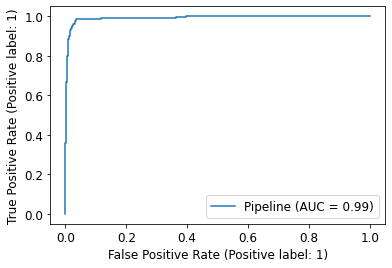

In [144]:
plot_roc_curve(model_xgb, X_test, y_test)

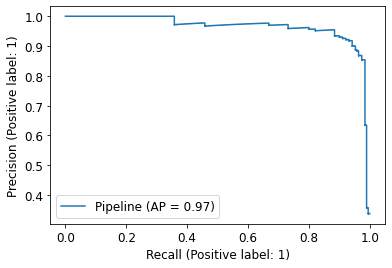

In [145]:
plot_precision_recall_curve(model_xgb, X_test, y_test)

### cross-validation and hyperparameter tuning with GridSearchCV

In [156]:
cv_params = {'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}
other_params = {'learning_rate': 0.3, 'n_estimators': 200, 'max_depth': 10, 
                'min_child_weight': 1, 'subsample': 1, 'colsample_bytree': 0.8,
                'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 0.1, 
                'n_jobs': -1, 'use_label_encoder': False, 'scale_pos_weight': 4.95}

In [157]:
steps = [('transfom', treeTransformer()),
         ('xgb', XGBClassifier(**other_params))]

gs=GridSearchCV(estimator = Pipeline(steps),
                param_grid = cv_params, 
                scoring=('roc_auc'),
                cv = 5,
                n_jobs=-1)

gs.fit(X_train, y_train)
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

[12:22:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('transfom',
                 <__main__.treeTransformer object at 0x7fe29e2986a0>),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, enable_categorical=False,
                               gamma=0.1, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                    

In [158]:
y_train_pred=gs.predict(X_train)
y_test_pred=gs.predict(X_test)
print(f'train:{roc_auc_score(y_train, y_train_proba[:,1])}')
print(f'test:{roc_auc_score(y_test, y_test_proba[:,1])}')

train:1.0
test:0.9910818713450292


## Logistic Regression

In [191]:
class lrTransformer():
    def fit(self, X, y=None):
        df=pd.DataFrame()
        #numerical: good feature to logistic regression
        df['Tenure']=X.Tenure
        df['WarehouseToHome']=X.WarehouseToHome
        df['NumberOfDeviceRegistered']=X.NumberOfDeviceRegistered
        df['SatisfactionScore']=X.SatisfactionScore
        df['CashbackAmount']=X.CashbackAmount 
        #high correlation with Tenure and PreferedOrderCat
        #numerical: for tree
        df['NumberOfAddress']=X.NumberOfAddress
        df['OrderAmountHikeFromlastYear']=X.OrderAmountHikeFromlastYear
        df['CouponUsed']=X.CouponUsed
        df['OrderCount']=X.OrderCount
        df['DaySinceLastOrder']=X.DaySinceLastOrder
        self.median=df.median()
    
        #catagorical 
        self.marital={'Single':3, 'Divorced':2, 'Married':1}
        self.cat= {'Laptop & Accessory':3, 'Mobile':5, 'Mobile Phone':5, 
                   'Others':2, 'Fashion':4, 'Grocery':1}
        
        df['MaritalStatus']=X.MaritalStatus.map(self.marital) 
        df['PreferedOrderCat']=X.PreferedOrderCat.map(self.cat)
        df['Complain']=X.Complain
        
        
    def transform(self, X, y=None):
        df=pd.DataFrame()
        #numerical: good feature to logistic regression
        df['Tenure']=X.Tenure
        df['WarehouseToHome']=X.WarehouseToHome
        df['NumberOfDeviceRegistered']=X.NumberOfDeviceRegistered
        df['SatisfactionScore']=X.SatisfactionScore
        df['CashbackAmount']=X.CashbackAmount
#         #numerical: for tree
        df['NumberOfAddress']=X.NumberOfAddress
        df['OrderAmountHikeFromlastYear']=X.OrderAmountHikeFromlastYear
        df['CouponUsed']=X.CouponUsed
        df['OrderCount']=X.OrderCount
        df['DaySinceLastOrder']=X.DaySinceLastOrder
        
        #catagorical
        df['MaritalStatus']=X.MaritalStatus.map(self.marital) 
        df['PreferedOrderCat']=X.PreferedOrderCat.map(self.cat)
        df['Complain']=X.Complain
        
        self.features=list(df.columns)
        return df.fillna(self.median) # fillana with medium
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(
df[df.WarehouseToHome<126][feature], df[df.WarehouseToHome<126][target], test_size=0.2, 
    stratify=df[df.WarehouseToHome<126][target],random_state=100)
# get rid of outliners

steps = [('transform', treeTransformer()),
         ('scaler', MinMaxScaler()),
         ('lr',LogisticRegression(class_weight='balanced'))]
model_lr = Pipeline(steps)
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)
y_train_proba = model_lr.predict_proba(X_train)
y_test_proba = model_lr.predict_proba(X_test)

print(f'train:{roc_auc_score(y_train, y_train_proba[:,1])}')
print(f'test:{roc_auc_score(y_test, y_test_proba[:,1])}')

train:0.8697648035085047
test:0.8662646669099148


In [193]:
print(f'train:{classification_report(y_train, y_train_pred)}')
print(f'test:{classification_report(y_test, y_test_pred)}')

train:              precision    recall  f1-score   support

           0       0.95      0.78      0.86      3610
           1       0.41      0.80      0.54       691

    accuracy                           0.78      4301
   macro avg       0.68      0.79      0.70      4301
weighted avg       0.87      0.78      0.81      4301

test:              precision    recall  f1-score   support

           0       0.95      0.79      0.86       903
           1       0.42      0.80      0.55       173

    accuracy                           0.79      1076
   macro avg       0.68      0.79      0.70      1076
weighted avg       0.87      0.79      0.81      1076



In [194]:
confusion_matrix(y_train, y_train_pred)

array([[2806,  804],
       [ 135,  556]])

In [195]:
confusion_matrix(y_test, y_test_pred)

array([[710, 193],
       [ 35, 138]])

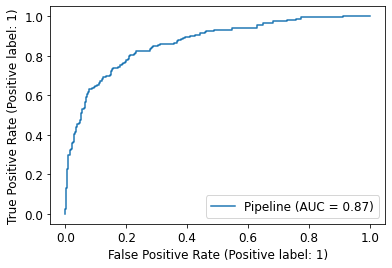

In [196]:
plot_roc_curve(model_lr, X_test, y_test)

In [197]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

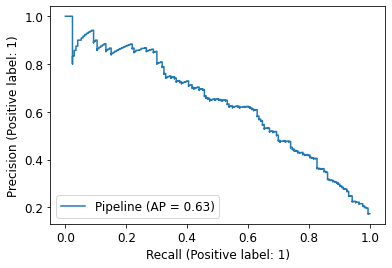

In [198]:
plot_precision_recall_curve(model_lr, X_test, y_test)

### feature importance

In [199]:
model_lr[-1].coef_

array([[-8.4807141 ,  0.87390126,  1.18713034,  0.96847018,  0.42281599,
         2.84302291, -0.50894474,  0.99432395,  1.28360567, -3.15750627,
         0.89109985,  2.14506493,  1.41529136]])

In [200]:
model_lr[-1].coef_.reshape(-1,)

array([-8.4807141 ,  0.87390126,  1.18713034,  0.96847018,  0.42281599,
        2.84302291, -0.50894474,  0.99432395,  1.28360567, -3.15750627,
        0.89109985,  2.14506493,  1.41529136])

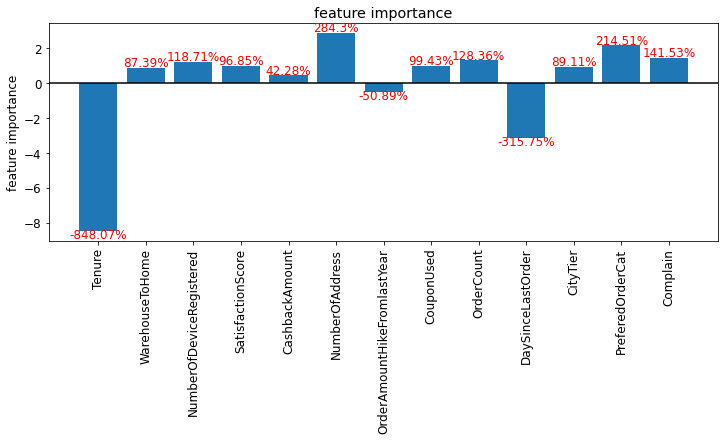

In [201]:
plt.figure(figsize=(12,4))
plt.bar(model_lr[0].features, model_lr[-1].coef_.reshape(-1,))
plt.ylabel('feature importance')
plt.title('feature importance')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black')

for index, value in enumerate(model_lr[-1].coef_.reshape(-1,)):
    plt.text(index, value+0.1 if value>0 else value-0.4, str((100*value).round(2))+'%', 
             ha='center', color='red')

### SHAP

In [202]:
# Fits the explainer with LinearExplainer
explainer=shap.LinearExplainer(model_lr[-1], model_lr[0].fit_transform(X_train))

# Calculates the SHAP values
shap_values = explainer(model_lr[0].transform(X_test))

In [203]:
# Fits the explainer with LinearExplainer
explainer=shap.LinearExplainer(model_lr[-1], model_lr[0].fit_transform(X_test))
# 用这个X_test 也可以，结果一样

# Calculates the SHAP values
shap_values = explainer(model_lr[0].transform(X_test))

In [204]:
# Manually convert to probability
odds=np.exp(shap_values.values)
probability=odds/(1+odds)
probability

array([[5.32022997e-71, 9.99997047e-01, 3.11015221e-01, ...,
        7.67468869e-01, 7.64909272e-01, 3.88673094e-01],
       [1.00000000e+00, 9.99766766e-01, 3.11015221e-01, ...,
        3.57064975e-01, 2.75822454e-01, 3.88673094e-01],
       [2.18320808e-08, 1.06826001e-01, 3.11015221e-01, ...,
        3.57064975e-01, 2.75822454e-01, 7.23601693e-01],
       ...,
       [1.73912627e-30, 9.99997047e-01, 5.96704630e-01, ...,
        5.75169362e-01, 9.65271564e-01, 3.88673094e-01],
       [1.00000000e+00, 8.61768439e-03, 3.11015221e-01, ...,
        3.57064975e-01, 9.65271564e-01, 3.88673094e-01],
       [2.56482503e-67, 9.99999486e-01, 1.21051773e-01, ...,
        5.75169362e-01, 4.26825799e-02, 7.23601693e-01]])

In [205]:
# convert base_values
base=np.exp(shap_values.base_values)/(1+np.exp(shap_values.base_values))
base
#但是转好之后plot里面还是用不了 需要explainer object

array([0.99882459, 0.99882459, 0.99882459, ..., 0.99882459, 0.99882459,
       0.99882459])

In [206]:
shap_values

.values =
array([[-161.81202507,   12.73274133,   -0.79537733, ...,    1.1940738 ,
           1.17978571,   -0.45289324],
       [  58.68654159,    8.36323504,   -0.79537733, ...,   -0.5881259 ,
          -0.96527922,   -0.45289324],
       [ -17.63988533,   -2.12358006,   -0.79537733, ...,   -0.5881259 ,
          -0.96527922,    0.96239813],
       ...,
       [ -68.52416995,   12.73274133,    0.39175301, ...,    0.30297395,
           3.32485064,   -0.45289324],
       [  50.20582749,   -4.74528383,   -0.79537733, ...,   -0.5881259 ,
           3.32485064,   -0.45289324],
       [-153.33131097,   14.48054385,   -1.98250767, ...,    0.30297395,
          -3.11034415,    0.96239813]])

.base_values =
array([6.74496379, 6.74496379, 6.74496379, ..., 6.74496379, 6.74496379,
       6.74496379])

.data =
array([[30., 31.,  3., ...,  3.,  4.,  0.],
       [ 4., 26.,  3., ...,  1.,  3.,  0.],
       [13., 14.,  3., ...,  1.,  3.,  1.],
       ...,
       [19., 31.,  4., ...,  2.,  5.,  0.],


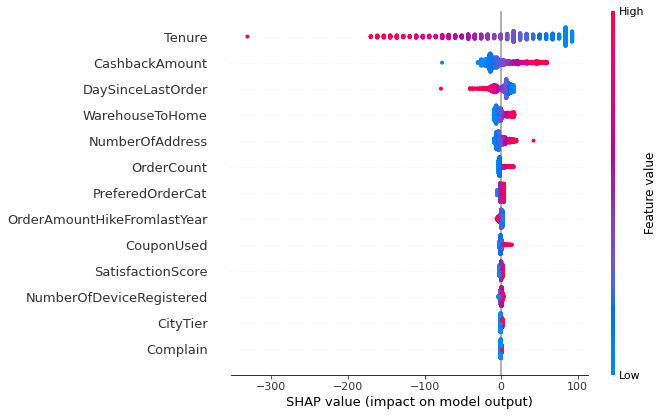

In [207]:
shap.summary_plot(shap_values, model_lr[0].transform(X_test))

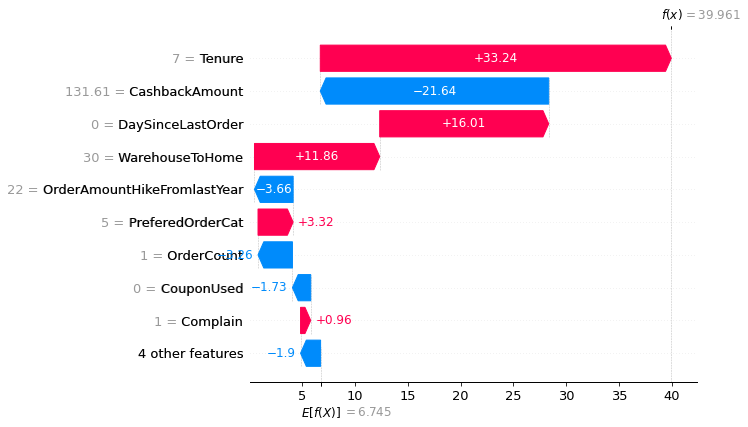

In [208]:
idx = 3
shap.plots.waterfall(shap_values[idx])

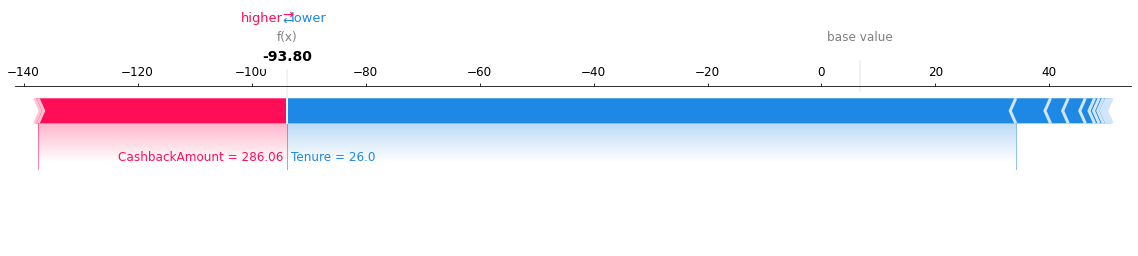

In [209]:
idx = 4
shap.plots.force(shap_values[idx], matplotlib=True)

# Post-model Analysis and Conclusion

## Model Performance

In [162]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
metric_df=pd.DataFrame({'train': [0.870, 1.000, 1.000], 
                        'test':  [0.866, 0.983, 0.991] }, 
                        index=models)

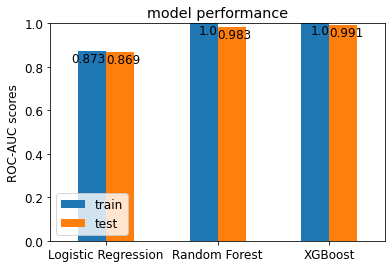

[12:22:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

In [167]:
metric_df.plot.bar(rot=0)
plt.ylabel('ROC-AUC scores')
plt.title('model performance')
plt.ylim(0,1)
plt.legend(loc='lower left')

for index, value in enumerate(metric_df.train):
    plt.text(index, value-0.05, value, ha='right')
for index, value in enumerate(metric_df.test):
    plt.text(index, value-0.05, value)   

## Feature Importance with SHAP

In [146]:
# Fits the explainer
explainer=shap.TreeExplainer(model_xgb[-1], model_xgb[0].transform(X_test), 
                             model_output='probability') 
                         #加这个参数 把输出从log-odd转化成probability
# Calculates the SHAP values - It takes some time
shap_values=explainer(model_xgb[0].transform(X_test))

In [147]:
shap_values

.values =
array([[ 0.13235017, -0.03919532,  0.03080986, ..., -0.01561119,
         0.0097726 , -0.13342635],
       [ 0.2698773 ,  0.02420633, -0.14397992, ..., -0.01855513,
        -0.02338991, -0.10941378],
       [-0.13881323, -0.01660018,  0.0113448 , ...,  0.01784811,
        -0.02580768, -0.05624962],
       ...,
       [ 0.32232126,  0.04316708,  0.02050434, ..., -0.01155509,
         0.06243177,  0.12362989],
       [-0.0844549 , -0.00197456,  0.00198827, ..., -0.01459941,
        -0.00757033, -0.04408509],
       [ 0.05276284, -0.02509341,  0.00371627, ...,  0.01250599,
        -0.05813823, -0.04789141]])

.base_values =
array([0.21150674, 0.21150674, 0.21150674, ..., 0.21150674, 0.21150674,
       0.21150674])

.data =
array([[ 1.,  8.,  4., ...,  1.,  5.,  0.],
       [ 1., 23.,  2., ...,  1.,  3.,  0.],
       [10., 23.,  5., ...,  3.,  3.,  0.],
       ...,
       [ 0., 13.,  3., ...,  1.,  5.,  1.],
       [13., 17.,  4., ...,  1.,  4.,  0.],
       [ 0.,  6.,  4., ..., 

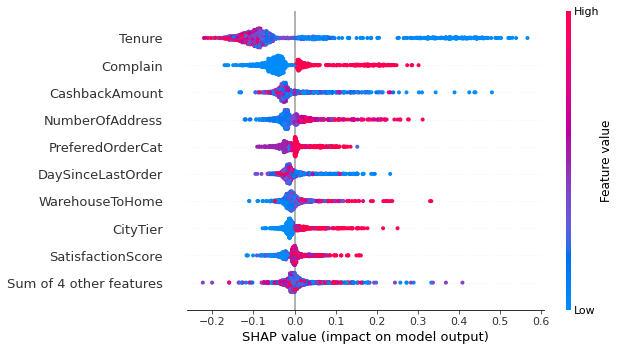

In [148]:
shap.plots.beeswarm(shap_values)

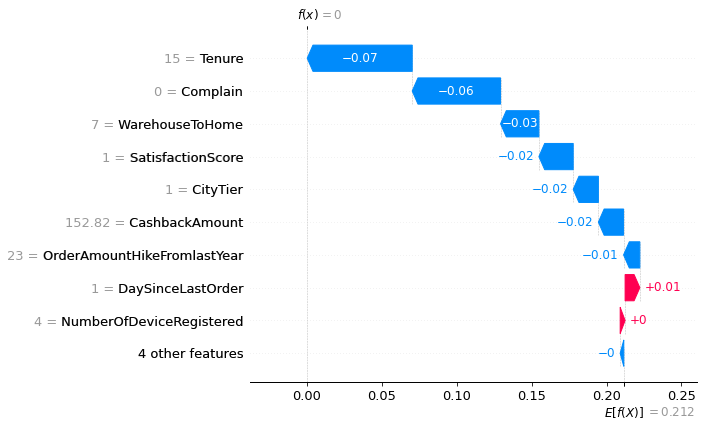

In [149]:
idx = 4
shap.plots.waterfall(shap_values[idx])

In [150]:
print(y_test_proba[4], y_test_pred[4])
print(y_test_proba[3], y_test_pred[3])

[9.9995494e-01 4.5049277e-05] 0
[1.8000603e-05 9.9998200e-01] 1


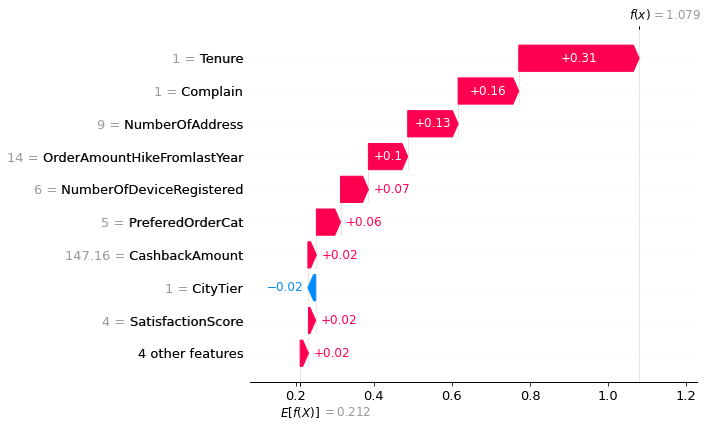

In [151]:
idx = 3
shap.plots.waterfall(shap_values[idx])

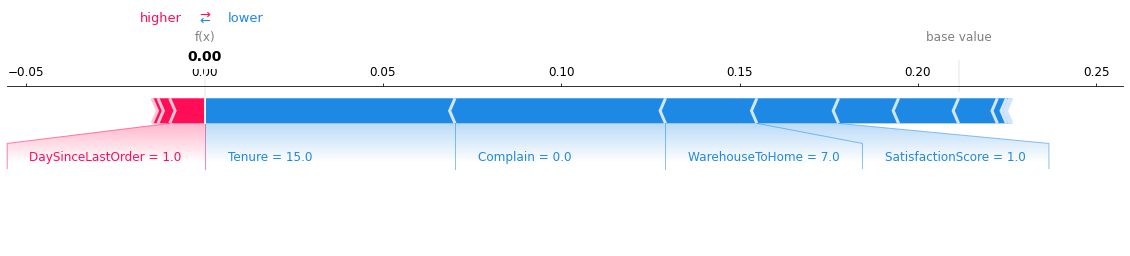

In [153]:
idx = 4
shap.plots.force(shap_values[idx], matplotlib=True)

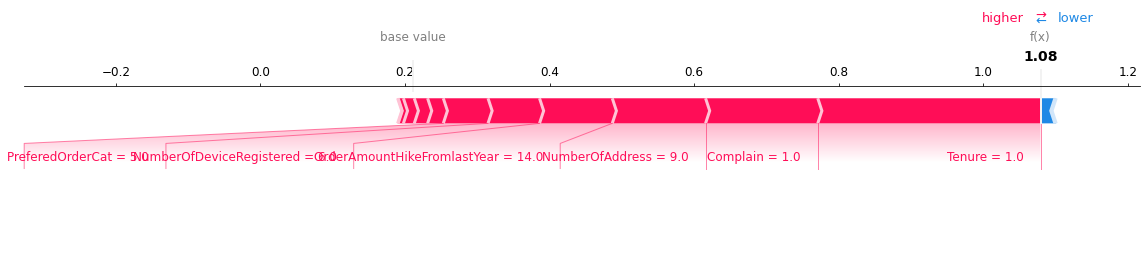

In [152]:
idx = 3
shap.plots.force(shap_values[idx], matplotlib=True)

## Customer Lifetime Value (CLV)

- estimate CLV by median of total cashbackamount
- totalAmount=df.CashbackAmount*df.OrderCount
- Asumming 3% cashback point

In [447]:
CLV=totalAmount.median()/0.03
CLV

10794.666666666666

## Actionable suggestions according to Profit Curve

In [132]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score

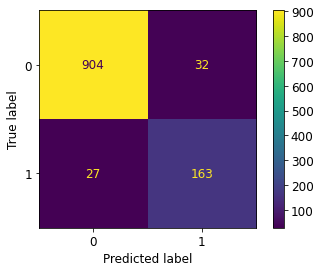

In [133]:
plot_confusion_matrix(model_rf, X_test, y_test)

In [300]:
clv=100
cost=10
cost_benefit_matrix=np.array([[0, -cost], [0, clv-cost]])

In [301]:
cost_benefit_matrix

array([[  0, -10],
       [  0,  90]])

In [302]:
expected_profit = np.sum(np.multiply(cm_normalized, cost_benefit_matrix))
expected_profit

0.0

In [139]:
clv=100
cost=10
gamma=0.8 #retention rate after accepting coupon
threshold=[0, 0.03, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1]
profit=[]
precision=[]
recall=[]
for n in threshold:
    for j in range(len(y_test_proba)):
        if y_test_proba[j][1]>=n:
            y_test_pred[j]=1
        else:
            y_test_pred[j]=0
    # calculate profit via confusion matrix
    cm_normalized = confusion_matrix(y_test, y_test_pred, normalize='all')
    cost_benefit_matrix = np.array([[0, -cost], [0, gamma*clv-cost]])
    expected_profit = np.sum(np.multiply(cm_normalized, cost_benefit_matrix))
    profit.append(expected_profit)
    # calculate precision and recall
    precision.append(precision_score(y_test, y_test_pred, zero_division=0))
    recall.append(recall_score(y_test, y_test_pred))

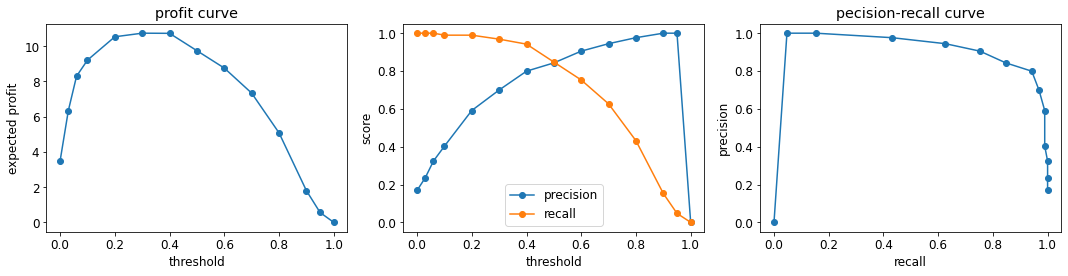

In [140]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.plot(threshold, profit, marker='o')
plt.xlabel('threshold')
plt.ylabel('expected profit')
plt.title('profit curve')

plt.subplot(132)
plt.plot(threshold, precision, marker='o', label='precision')
plt.plot(threshold, recall, marker='o', label='recall')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend(loc="best")

plt.subplot(133)
plt.plot(recall, precision, marker='o')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('pecision-recall curve')

plt.tight_layout()
# profit curve for random forest

Actionable suggestion: the best threshold is 0.4. Send coupons to those predicted churn probability greater than 0.4, so to have the maximum expected profit from each customer.

In [186]:
clv=100
cost=10
gamma=0.8 #retention rate after accepting coupon
threshold=[0, 0.03, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
           0.99, 0.999, 0.9999, 0.99999, 1]
profit=[]
precision=[]
recall=[]
for n in threshold:
    for j in range(len(y_test_proba)):
        if y_test_proba[j][1]>=n:
            y_test_pred[j]=1
        else:
            y_test_pred[j]=0
    # calculate profit via confusion matrix
    cm_normalized = confusion_matrix(y_test, y_test_pred, normalize='all')
    cost_benefit_matrix = np.array([[0, -cost], [0, gamma*clv-cost]])
    expected_profit = np.sum(np.multiply(cm_normalized, cost_benefit_matrix))
    profit.append(expected_profit)
    # calculate precision and recall
    precision.append(precision_score(y_test, y_test_pred, zero_division=0))
    recall.append(recall_score(y_test, y_test_pred))

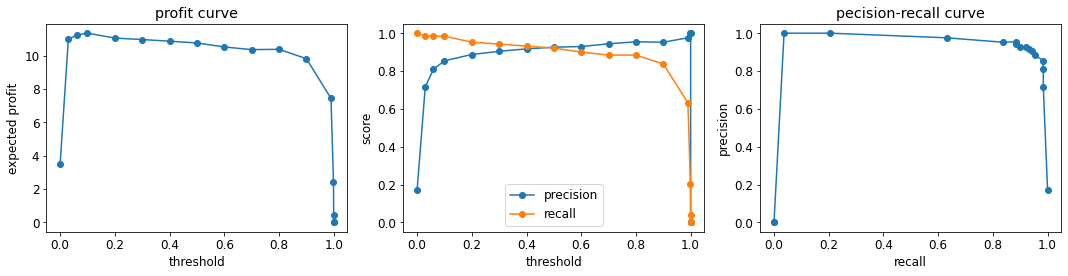

In [187]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.plot(threshold, profit, marker='o')
plt.xlabel('threshold')
plt.ylabel('expected profit')
plt.title('profit curve')

plt.subplot(132)
plt.plot(threshold, precision, marker='o', label='precision')
plt.plot(threshold, recall, marker='o', label='recall')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend(loc="best")

plt.subplot(133)
plt.plot(recall, precision, marker='o')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('pecision-recall curve')

plt.tight_layout()

# profit curve of xgboost